In [1]:
import folium as folium
import matplotlib.cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap

In [2]:
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397]   
}

In [3]:
#data = pd.read_csv('state.csv')
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")
print(df_india)

                             confirmed  recovered  deaths  active
state                                                            
Maharashtra                        537         50      26     461
Tamil Nadu                         485          6       2     477
Delhi                              445          8       6     431
Kerala                             306         50       2     254
Telangana                          229         32      11     186
Uttar Pradesh                      234         21       2     211
Rajasthan                          200         25       0     175
Andhra Pradesh                     190          2       1     187
Madhya Pradesh                     154          0      11     143
Karnataka                          144         11       4     129
Gujarat                            108         10      10      88
Jammu and Kashmir                   92          3       2      87
Haryana                             84         28       0      56
Punjab    

In [4]:
df_india["Lat"] = ""
df_india["Long"] = ""
for index in df_india.index :
    df_india.loc[df_india.index == index,"Lat"] = locations[index][0]
    df_india.loc[df_india.index == index,"Long"] = locations[index][1]


In [5]:
df_india.head()

,confirmed,recovered,deaths,active,Lat,Long
state,,,,,,
Maharashtra,537,50,26,461,19.7515,75.7139
Tamil Nadu,485,6,2,477,11.1271,78.6569
Delhi,445,8,6,431,28.7041,77.1025
Kerala,306,50,2,254,10.8505,76.2711
Telangana,229,32,11,186,18.1124,79.0193


In [6]:
df_india.describe()

,confirmed,recovered,deaths,active
count,37.000000,37.000000,37.000000,37.000000
mean,94.621622,7.189189,2.459459,84.972973
std,144.272572,13.280809,5.080434,132.437299
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000
50%,20.000000,2.000000,0.000000,18.000000
75%,144.000000,6.000000,2.000000,129.000000
max,537.000000,50.000000,26.000000,477.000000


In [7]:
states_group = df_india.groupby(by = 'state')
sat_list = []

for key, group in states_group:
    sat = 0
    for row in group.iterrows():
        sat += row[1][0]
    sat_list.append((key,sat))
print(sat_list)

[('Andaman and Nicobar Islands', 10), ('Andhra Pradesh', 190), ('Arunachal Pradesh', 1), ('Assam', 25), ('Bihar', 32), ('Chandigarh', 18), ('Chhattisgarh', 10), ('Dadra and Nagar Haveli', 0), ('Daman and Diu', 0), ('Delhi', 445), ('Goa', 7), ('Gujarat', 108), ('Haryana', 84), ('Himachal Pradesh', 6), ('Jammu and Kashmir', 92), ('Jharkhand', 2), ('Karnataka', 144), ('Kerala', 306), ('Ladakh', 14), ('Lakshadweep', 0), ('Madhya Pradesh', 154), ('Maharashtra', 537), ('Manipur', 2), ('Meghalaya', 0), ('Mizoram', 1), ('Nagaland', 0), ('Odisha', 20), ('Puducherry', 5), ('Punjab', 65), ('Rajasthan', 200), ('Sikkim', 0), ('Tamil Nadu', 485), ('Telangana', 229), ('Tripura', 0), ('Uttar Pradesh', 234), ('Uttarakhand', 22), ('West Bengal', 53)]


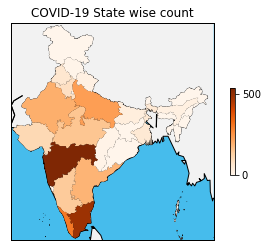

In [8]:
fig, ax = plt.subplots()
m = Basemap(resolution='c', projection='merc', lat_0=54.5, lon_0=-4.36, llcrnrlon=67.83, llcrnrlat=7.75, urcrnrlon=98.29, urcrnrlat=37.42)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()

m.readshapefile('INDIA', 'INDIA')

satlist = []

for state_info in m.INDIA_info:
    state = state_info['ST_NAME'].title()
    sat1 = 0

    for x in sat_list:
        if x[0] == state:
            sat1 = x[1]
            break
    satlist.append(sat1)

df_poly = pd.DataFrame({'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
                        'area': [area['ST_NAME'] for area in m.INDIA_info],
                        'satlist': satlist})

shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
cmap = plt.get_cmap('Oranges')

pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['satlist'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(satlist)
plt.colorbar(mapper, shrink=0.4)

ax.set_title('COVID-19 State wise count')
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams.update({'font.size': 20})
plt.show()

In [9]:
india = folium.Map(location=[20.5937, 78.9629], zoom_start=4,max_zoom=6,min_zoom=4,tiles='cartodbpositron',height = 700)
for i in range(0,len(df_india[df_india['confirmed']>0].index)):
    folium.Circle(
        location=[df_india.iloc[i]['Lat'], df_india.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_india.iloc[i].name+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_india.iloc[i]['confirmed'])+"</li>"+
        "<li>Active:   "+str(df_india.iloc[i]['active'])+"</li>"+
        "<li>Recovered:   "+str(df_india.iloc[i]['recovered'])+"</li>"+
        "<li>Deaths:   "+str(df_india.iloc[i]['deaths'])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_india.iloc[i]['deaths']/(df_india.iloc[i]['confirmed']+1)*100,2))+"</li>"+
        "</ul>",
        radius=(int(np.log2(df_india.iloc[i]['confirmed']+1)))*9000,
        color='red',
        fill_color='green',
        fill=True).add_to(india)
india
